In [60]:
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf

In [65]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [66]:
train_generator = datagen.flow_from_directory(
    directory="shells_pebbles",
    target_size=(180, 180),
    classes=['shells', 'pebbles'],
    class_mode='binary',
    batch_size=128,
    shuffle=True
)

Found 4284 images belonging to 2 classes.


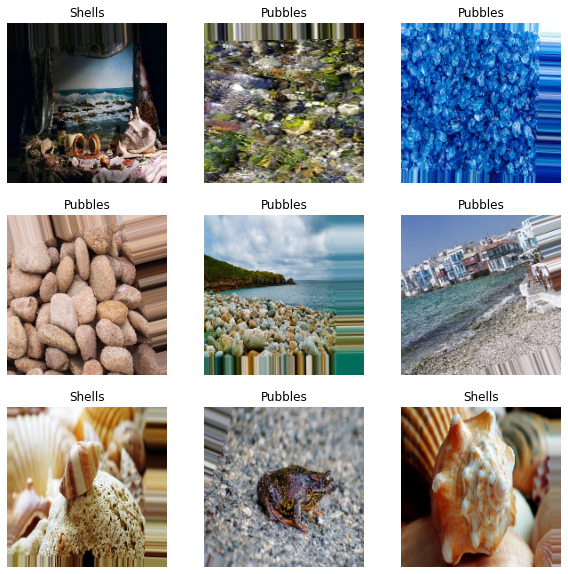

In [146]:
images, labels = train_generator.next()

def plot_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].astype("uint8"))
        plt.title("Shells" if labels[i] == 0 else "Pubbles")
        plt.axis("off")
    plt.show()

plot_images(images, labels)

In [68]:
model = keras.Sequential([
    layers.Rescaling(1.0 / 255),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1)
])

In [69]:
model.compile(
    optimizer='adam',
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [70]:
model.fit(train_generator, epochs=5)

Epoch 1/5
34/34 [==============================] - 104s 3s/step - loss: 0.8263 - accuracy: 0.5943
Epoch 2/5
34/34 [==============================] - 114s 3s/step - loss: 0.6990 - accuracy: 0.6391
Epoch 3/5
34/34 [==============================] - 99s 3s/step - loss: 0.6685 - accuracy: 0.6599
Epoch 4/5
34/34 [==============================] - 101s 3s/step - loss: 0.6485 - accuracy: 0.6746
Epoch 5/5
34/34 [==============================] - 91s 3s/step - loss: 0.6212 - accuracy: 0.6828


(-0.5, 179.5, 179.5, -0.5)

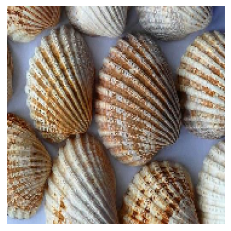

In [137]:
img = keras.utils.load_img("shells_pebbles/shells/Shells (793).jpg", target_size=(180, 180))
plt.imshow(img)
plt.axis("off")

In [139]:
img_array = keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

In [140]:
predictions = model.predict(img_array)
score = float(tf.math.sigmoid(predictions[0][0]))

1/1 [==============================] - 0s 30ms/step


In [144]:
pred = "shells" if (1-score) > 0.6 else "pubbles"
print(f"Most likely it's {pred}")

Most likely it's shells
